## Health related Lifestyle


In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load Data
data = pd.read_csv('diet_29.05.2024\diet_merged.csv')
# data = data_full.tail(600)

In [4]:
data

,Timestamp,Patient ID,Name,Mobile Number,Date of Birth,Age,Gender,Ethnicity,Country,Current Location,...,What time did wake up today,Are you on any type of medication,"Mention the medicines you take, and the amount of dosage","On a scale of 0 to 10, how would you rate your stress/anxiety level","If you did feel stressed today, how did you deal with it",Does any of your close family have the same health conditions as you,"If yes, mention what condition do you have in common","If Yes, Mention your relationship to the person who has the same condition as you.",At what age did this person get diagnosed,Is there anything else you would like to share about your dietary habits or health that has not been covered in this survey?
0,2/22/2024,2217025,Jeevan Fernandes,7019093139,4/30/2000,24.0,Male,Indian,India,"Mangalore, Karnataka",...,8:00:00 AM,No,No,7.0,Finish my work,No,NaN,NaN,NaN,NaN
1,2/22/2024,2217093,Nishmitha,7019069027,9/22/2001,23.0,Female,Indian,India,"Udupi, Karnataka",...,NaN,No,No,7.0,NaN,No,NaN,NaN,NaN,drink water
2,2/22/2024,2217004,Ranjith Kumar B,9447614488,5/25/1966,58.0,Male,Indian,India,Kanhangad,...,5:00:00 AM,No,No,3.0,NaN,Yes,Diabetes,Father,NaN,NaN
3,2/22/2024,2217031,Dainabi,8086630926,6/20/1968,56.0,Female,Indian,India,"Kasaragod, Kerala",...,5:00:00 AM,No,No,5.0,NaN,No,NaN,NaN,NaN,NaN
4,2/23/2024,P11184(16096),Vidya Sathish,9480326214,11/6/1967,57.0,Female,Indian,India,Shivmoga LBS Nagar Karnataka,...,7:00:00 AM,No,dibetetes morning tablete,2.0,no,No,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2024/05/27 2:47:40 PM GMT+5:30,231924,Diego Fernandes,+971 50 846 8677,9/11/2002,21.0,Male,Arabian,NaN,Dubai Shar Jah,...,6:30:00 AM,No,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1148,2024/05/27 2:57:45 PM GMT+5:30,231929,Wiliam,68672578,NaN,34.0,Male,Indian,India,Mysore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1149,2024/05/27 3:37:36 PM GMT+5:30,231908,Rash,NaN,NaN,22.0,Female,NaN,India,Bangalore,...,6:25:00 AM,No,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1150,2024/05/27 3:55:17 PM GMT+5:30,231903,Deepak,8431283262,4/17/2002,22.0,Male,NaN,India,Manipal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 57 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   Timestamp                                                                                                                     1152 non-null   object 
 1   Patient ID                                                                                                                    1146 non-null   object 
 2   Name                                                                                                                          1149 non-null   object 
 3   Mobile Number                                                                                                    

### Clean Data

In [6]:
# Categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'      
    elif 18.5 <= bmi < 25:
        return 'Normal Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

In [7]:
# Function to preprocess demographic data
def preprocess_data(data):
    # Convert data types for numeric columns
    data['Weight (kg)'] = pd.to_numeric(data['Weight (kg)'], errors='coerce')
    data['Height (cm)'] = pd.to_numeric(data['Height (cm)'], errors='coerce')
    
    # Drop rows with missing weight and height values
    data.dropna(subset=['Weight (kg)', 'Height (cm)'], inplace=True)
    
    # Calculate BMI
    data['BMI'] = data['Weight (kg)'] / ((data['Height (cm)'] / 100) ** 2)
    
    # Define age groups
    age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
    age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
    data.loc[:, 'Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
    
    # BMI Class
    # Define age threshold for excluding children (e.g., age below 18)
    age_threshold = 18
    data = data[data['Age'] >= age_threshold].copy()
    data['BMI Category'] = data['BMI'].apply(categorize_bmi)
    
    
    # Sleep Hours
    data['sleep_time'] = pd.to_datetime(data['What time did you sleep last night'])
    data['wake_up_time'] = pd.to_datetime(data['What time did wake up today'])

    data['wake_up_time'] = data.apply(lambda row: row['wake_up_time'] + pd.DateOffset(days=1) if row['wake_up_time'] < row['sleep_time'] else row['wake_up_time'], axis=1)

    # Calculate time slept
    data['time_slept'] = data['wake_up_time'] - data['sleep_time']

    # Extract hours from the time slept
    data['Sleep Hours'] = (data['time_slept'].dt.total_seconds() / 3600).round(2)
    
    return data

### Demographics Analysis

In [8]:
demographic_data = preprocess_data(data.copy())

In [9]:
# Drop rows with missing weight and height values
demographic_data.dropna(subset=['Weight (kg)', 'Height (cm)'], inplace=True)

In [10]:
# Average weight and height by gender
avg_weight_height = demographic_data.groupby('Gender').agg({'Weight (kg)': 'mean', 'Height (cm)': 'mean'}).reset_index()
print(avg_weight_height)

# Average weight and height by gender bar chart
fig_avg_weight_height = px.bar(avg_weight_height, x='Gender', y=['Weight (kg)', 'Height (cm)'],
                               title='Average Weight and Height by Gender', barmode='group')
fig_avg_weight_height.show()

   Gender  Weight (kg)  Height (cm)
0  Female    57.190891   159.296136
1    Male    67.151688   169.747573


In [11]:
# Distribution of age
fig_age = px.histogram(demographic_data, x='Age', nbins=20, title='Distribution of Age')
fig_age.show()

In [12]:
# Gender distribution
fig_gender = px.pie(demographic_data, names='Gender', title='Gender Distribution')
fig_gender.show()

In [13]:
# Count the number of people in each BMI category
bmi_counts = demographic_data['BMI Category'].value_counts()

# Plotting BMI distribution excluding children
fig_bmi_distribution = px.bar(bmi_counts, x=bmi_counts.index, y=bmi_counts.values,
                              labels={'x': 'BMI Category', 'y': 'Number of People'},
                              title='BMI Distribution (Excluding people below 18)')

# Show the plot
fig_bmi_distribution.show()

### Dietary Habits 

In [14]:
dietary_data = preprocess_data(data.copy())

In [15]:
# Food Preference distribution
fig_food_preference = px.bar(dietary_data, x=dietary_data['Food Preference'].value_counts().index,
                             y=dietary_data['Food Preference'].value_counts().values,
                             title='Food Preference Distribution')
fig_food_preference.show()

In [16]:
fig_meals_per_day = px.histogram(dietary_data, x="How many times a day do you normally eat (include all solid foods i.e., breakfast, lunch, evening snack, dinner)", title="Number of Meals per Day Distribution")
fig_meals_per_day.show()

In [17]:
# Analyze portion sizes
portion_sizes = ['Small', 'Moderate', 'Large']
portion_size_columns = ['How would you rate the portion size of your Breakfast', 'How would you rate the portion size of your lunch',
                        'How would you rate the portion size of your snack', 'How would you rate the portion size of your Dinner']

portion_size_counts = {}
for col in portion_size_columns:
    portion_size_counts[col] = dietary_data[col].value_counts().reindex(portion_sizes, fill_value=0)

# Convert counts to percentages
portion_size_percentages = {}
for col, counts in portion_size_counts.items():
    total_count = counts.sum()
    portion_size_percentages[col] = counts / total_count * 100

# Display the percentage of portion sizes for each meal
for col, percentages in portion_size_percentages.items():
    print(f"Portion Size Distribution for {col}:")
    print(percentages,"\n")

Portion Size Distribution for How would you rate the portion size of your Breakfast:
Small       19.903846
Moderate    74.230769
Large        5.865385
Name: How would you rate the portion size of your Breakfast, dtype: float64 

Portion Size Distribution for How would you rate the portion size of your lunch:
Small        9.942639
Moderate    78.871893
Large       11.185468
Name: How would you rate the portion size of your lunch, dtype: float64 

Portion Size Distribution for How would you rate the portion size of your snack:
Small       53.167421
Moderate    43.778281
Large        3.054299
Name: How would you rate the portion size of your snack, dtype: float64 

Portion Size Distribution for How would you rate the portion size of your Dinner:
Small       22.355289
Moderate    71.157685
Large        6.487026
Name: How would you rate the portion size of your Dinner, dtype: float64 



In [18]:
# Convert data to DataFrame
portion_size_data = pd.DataFrame.from_dict(portion_size_percentages)

# Create pie charts using Plotly Express
fig_breakfast = px.pie(data_frame=portion_size_data, names=portion_size_data.index,
                       values=portion_size_data['How would you rate the portion size of your Breakfast'],
                       title='Portion Size Distribution for Breakfast')

fig_lunch = px.pie(data_frame=portion_size_data, names=portion_size_data.index,
                   values=portion_size_data['How would you rate the portion size of your lunch'],
                   title='Portion Size Distribution for Lunch')

fig_snack = px.pie(data_frame=portion_size_data, names=portion_size_data.index,
                   values=portion_size_data['How would you rate the portion size of your snack'],
                   title='Portion Size Distribution for Snack')

fig_dinner = px.pie(data_frame=portion_size_data, names=portion_size_data.index,
                    values=portion_size_data['How would you rate the portion size of your Dinner'],
                    title='Portion Size Distribution for Dinner')

# Show the plots
fig_breakfast.show()
fig_lunch.show()
fig_snack.show()
fig_dinner.show()

In [19]:
# Portion size of meal type by age group

meal_type = 'lunch' # Breakfast, lunch, snack, Dinner

# Define age groups
age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
dietary_data.loc[:, 'Age Group'] = pd.cut(dietary_data['Age'], bins=age_bins, labels=age_labels)

# Group by age group and sleep hours, then count the number of occurrences
dietary_data_grouped = dietary_data.groupby(['Age Group', f'How would you rate the portion size of your {meal_type}'], observed=False).size().reset_index(name='Count')

# Create a bar chart for sleep hours vs. age group
fig_diet_age = px.bar(dietary_data_grouped, x='Age Group', y='Count', color=f'How would you rate the portion size of your {meal_type}', 
                         title=f'Portion {meal_type} size by Age Group',
                         labels={'value': 'Number of People', 'Age Group': 'Age Group'},
                         category_orders={'Enter Sleeping hours': ['Small', 'Moderate', 'Large']})

# Show the plot
fig_diet_age.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17980\1736152773.py:8: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [20]:
# Water Intake distribution
fig_water_intake = px.histogram(dietary_data, x='Water Intake', title='Water Intake Distribution')
fig_water_intake.show()

In [21]:
# Water distribution based on thirst levels of people
fig_water_intake_scale = px.histogram(dietary_data, x="On a scale of 0 to 10, how thirsty do you feel today", title="Water Intake Distribution")
fig_water_intake_scale.show()

### Physical Activity

In [22]:
activity_data = preprocess_data(data.copy())

In [23]:
# Physical Activity distribution
fig_activity_distribution = px.bar(activity_data, x=activity_data['Did you do any physical activity today'].value_counts().index,
                                   y=activity_data['Did you do any physical activity today'].value_counts().values,
                                   title='Physical Activity Distribution')
fig_activity_distribution.show()

In [24]:
# Count the frequency of each combination of gender and activity
frequency_df = activity_data.groupby(['Gender', 'Did you do any physical activity today']).size().reset_index(name='count')

# Grouped bar chart
fig = px.bar(frequency_df, x='Gender', y='count', color='Did you do any physical activity today', barmode='group', title='Activity Participation by Gender')

fig.show()

In [25]:
# Split multiple activities into separate rows
activity_data_split = activity_data['If you did Physical Activity, mention what activities did you do'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
activity_data_split.name = 'Exercise Type'

# Count occurrences of each activity
activity_co_occurrence_counts = activity_data_split.value_counts()

# Visualize co-occurrence using a bar chart
fig_activity_co_occurrence = px.bar(x=activity_co_occurrence_counts.index, y=activity_co_occurrence_counts.values,
                                    title='Exercise Type', labels={'x': 'Exercise Type', 'y': 'Count'})
fig_activity_co_occurrence.show()



In [26]:
# Split multiple activities into separate rows
activity_data_split = activity_data['If you did Physical Activity, mention what activities did you do'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
activity_data_split.name = 'Exercise Type'
df_activity = activity_data.drop(columns='If you did Physical Activity, mention what activities did you do').join(activity_data_split)

# Count occurrences of each activity per age group
activity_age_group_counts = df_activity.groupby(['Age Group', 'Exercise Type']).size().reset_index(name='count')

# Visualize co-occurrence using a stacked bar chart
fig_activity_age_group = px.bar(activity_age_group_counts, x='Exercise Type', y='count', color='Age Group',
                                title='Exercise Type by Age Group', labels={'count': 'Count'})

fig_activity_age_group.show()

### Sleep Habits

In [50]:
sleep_data = preprocess_data(data.copy())

In [28]:
# Sleep distribution
fig_sleep = px.pie(sleep_data, names='Enter Sleeping hours', title='Sleep Distribution in Hours')
fig_sleep.show()

In [29]:
# Group by age group and sleep hours, then count the number of occurrences
sleep_data_grouped = sleep_data.groupby(['Age Group', 'Enter Sleeping hours'], observed=False).size().reset_index(name='Count')

# Create a bar chart for sleep hours vs. age group
fig_sleep_hours = px.bar(sleep_data_grouped, x='Age Group', y='Count', color='Enter Sleeping hours', 
                         title='Sleep Hours by Age Group',
                         labels={'value': 'Number of People', 'Age Group': 'Age Group'},
                         category_orders={'Enter Sleeping hours': ['Less than 5 hrs', '6 - 7 hrs',
                                                                    '7 - 8 hrs', 'More than 8 hrs']})

# Show the plot
fig_sleep_hours.show()

In [30]:
# Check correlation between BMI and Sleeping hours
correlation_bmi_sleep = sleep_data['BMI'].corr(sleep_data['Sleep Hours'])
print(f'Correlation between BMI and Sleeping hours: {correlation_bmi_sleep}')

Correlation between BMI and Sleeping hours: 0.052383628754988296


In [31]:
# Create a scatter plot to visualize the relationship between BMI and Enter Sleeping hours
fig_sleep = px.scatter(sleep_data, x='BMI', y='Sleep Hours', title="BMI vs Enter Sleeping hours")
fig_sleep.show()

In [32]:
# Plotting BMI vs Enter Sleeping hours
fig1 = px.scatter(sleep_data, x='BMI', y='Sleep Hours', color='Gender')
fig1.show()

In [33]:
# Bar graph: Relationship between BMI Category and average Sleeping hours
avg_sleeping_hours = sleep_data.groupby('BMI Category')['Sleep Hours'].mean().reset_index()
fig8 = px.bar(avg_sleeping_hours, x='BMI Category', y='Sleep Hours', title="Average Sleeping hours by BMI Category")
fig8.show()

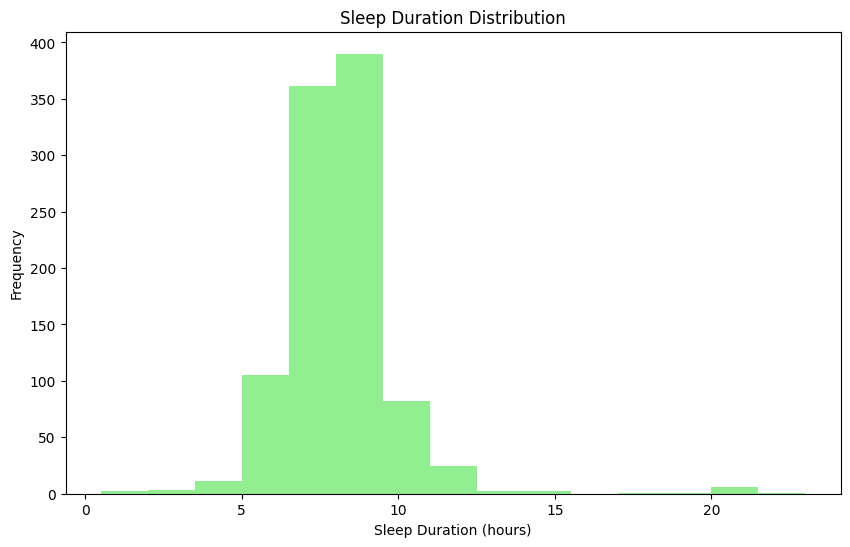

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(sleep_data['Sleep Hours'], bins=15, color='lightgreen')
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

### Stress levels

In [34]:
stress_data = preprocess_data(data.copy())

In [35]:
# Group by BMI Category and calculate the average stress/anxiety level
avg_stress_by_bmi = stress_data.groupby('BMI Category')['On a scale of 0 to 10,  how would you rate your stress/anxiety level'].mean().reset_index()

# Create bar chart using Plotly Express
fig = px.bar(avg_stress_by_bmi, x='BMI Category', y='On a scale of 0 to 10,  how would you rate your stress/anxiety level', 
             title='Average Stress/Anxiety Level by BMI Category', 
             labels={'BMI Category': 'BMI Category', 'On a scale of 0 to 10,  how would you rate your stress/anxiety level': 'Average Stress/Anxiety Level'})

print(avg_stress_by_bmi)
# Show the plot
fig.show()

    BMI Category  \
0  Normal Weight   
1          Obese   
2     Overweight   
3    Underweight   

   On a scale of 0 to 10,  how would you rate your stress/anxiety level  
0                                           4.515464                     
1                                           4.280000                     
2                                           4.842105                     
3                                           4.477273                     


### Diseases Data

In [36]:
disease_data = preprocess_data(data.copy())

In [37]:
# Frequency distribution of diseases/conditions
disease_counts = disease_data['All Disease/ Conditions'].value_counts()

# Exclude 'Nothing' from the frequency distribution
disease_counts = disease_counts[disease_counts.index != 'Nothing']

In [38]:
# Visualize frequency distribution using a bar chart
fig_frequency = px.bar(disease_counts, x=disease_counts.index, y=disease_counts.values,
                       title='Frequency Distribution of Diseases/Conditions')
fig_frequency.update_layout(xaxis_title='Disease/Condition', yaxis_title='Frequency')

In [39]:
# Exclude 'Nothing' from the DataFrame
disease_data_exclude = disease_data[disease_data['All Disease/ Conditions'] != 'Nothing']

# Count the occurrences of each disease and food preference combination
disease_data_counts = disease_data_exclude.groupby(['All Disease/ Conditions', 'Food Preference']).size().reset_index(name='Count')

# Plotting the stacked bar chart
fig = px.bar(disease_data_counts, x='All Disease/ Conditions', y='Count', color='Food Preference', 
             title='Count of Diseases by Food Preference', 
             labels={'All Disease/ Conditions ': 'Disease/Condition', 'Count': 'Count'})
fig.show()

* Seperating all diseases

In [40]:
# Splitting individual dieseases
disease_data_split = disease_data['All Disease/ Conditions'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
disease_data_split.name = 'Disease/Condition'
# Drop rows with 'Nothing' value
disease_data_split = disease_data_split[disease_data_split != 'Nothing']
disease_data_co_occurrence = disease_data_split.reset_index(drop=True)
co_occurrence_counts = disease_data_co_occurrence.value_counts()

In [41]:
# Visualize co-occurrence using a bar chart
fig_co_occurrence = px.bar(co_occurrence_counts, x=co_occurrence_counts.index, y=co_occurrence_counts.values,
                           title='Diseases/Conditions')
fig_co_occurrence.update_layout(xaxis_title='Disease/Condition', yaxis_title='Count')

fig_co_occurrence.show()

In [42]:
# Filter out 'Nothing' entries
df_filtered = disease_data[disease_data['All Disease/ Conditions'] != 'Nothing']

# Split multiple diseases into separate rows
diseases_split = df_filtered['All Disease/ Conditions'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
diseases_split.name = 'Disease'
df_diseases = df_filtered.drop(columns='All Disease/ Conditions').join(diseases_split)

# Count occurrences of each disease per age group
disease_counts = df_diseases.groupby(['Age Group', 'Disease']).size().reset_index(name='count')

# Bar chart showing count of diseases by age group
fig = px.bar(disease_counts, x='Disease', y='count', color='Age Group', title='Count of Diseases by Age Group',
             labels={'count': 'Count', 'Age Group': 'Age Group', 'Disease': 'Disease'}, barmode='stack')

fig.show()

In [48]:
# Filter out 'Nothing' entries
df_filtered = disease_data[disease_data['All Disease/ Conditions'] != 'Nothing']

# Split multiple diseases into separate rows
diseases_split = df_filtered['All Disease/ Conditions'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
diseases_split.name = 'Disease'
df_diseases = df_filtered.drop(columns='All Disease/ Conditions').join(diseases_split)

# Count occurrences of each disease per age group
disease_counts = df_diseases.groupby(['Food Preference', 'Disease']).size().reset_index(name='count')

# Bar chart showing count of diseases by age group
fig = px.bar(disease_counts, x='Disease', y='count', color='Food Preference', title='Count of Diseases by Age Group',
             labels={'count': 'Count', 'Disease': 'Disease'}, barmode='stack')

fig.show()

### Complete Analysis

In [43]:
df = preprocess_data(data.copy())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17980\3792922168.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



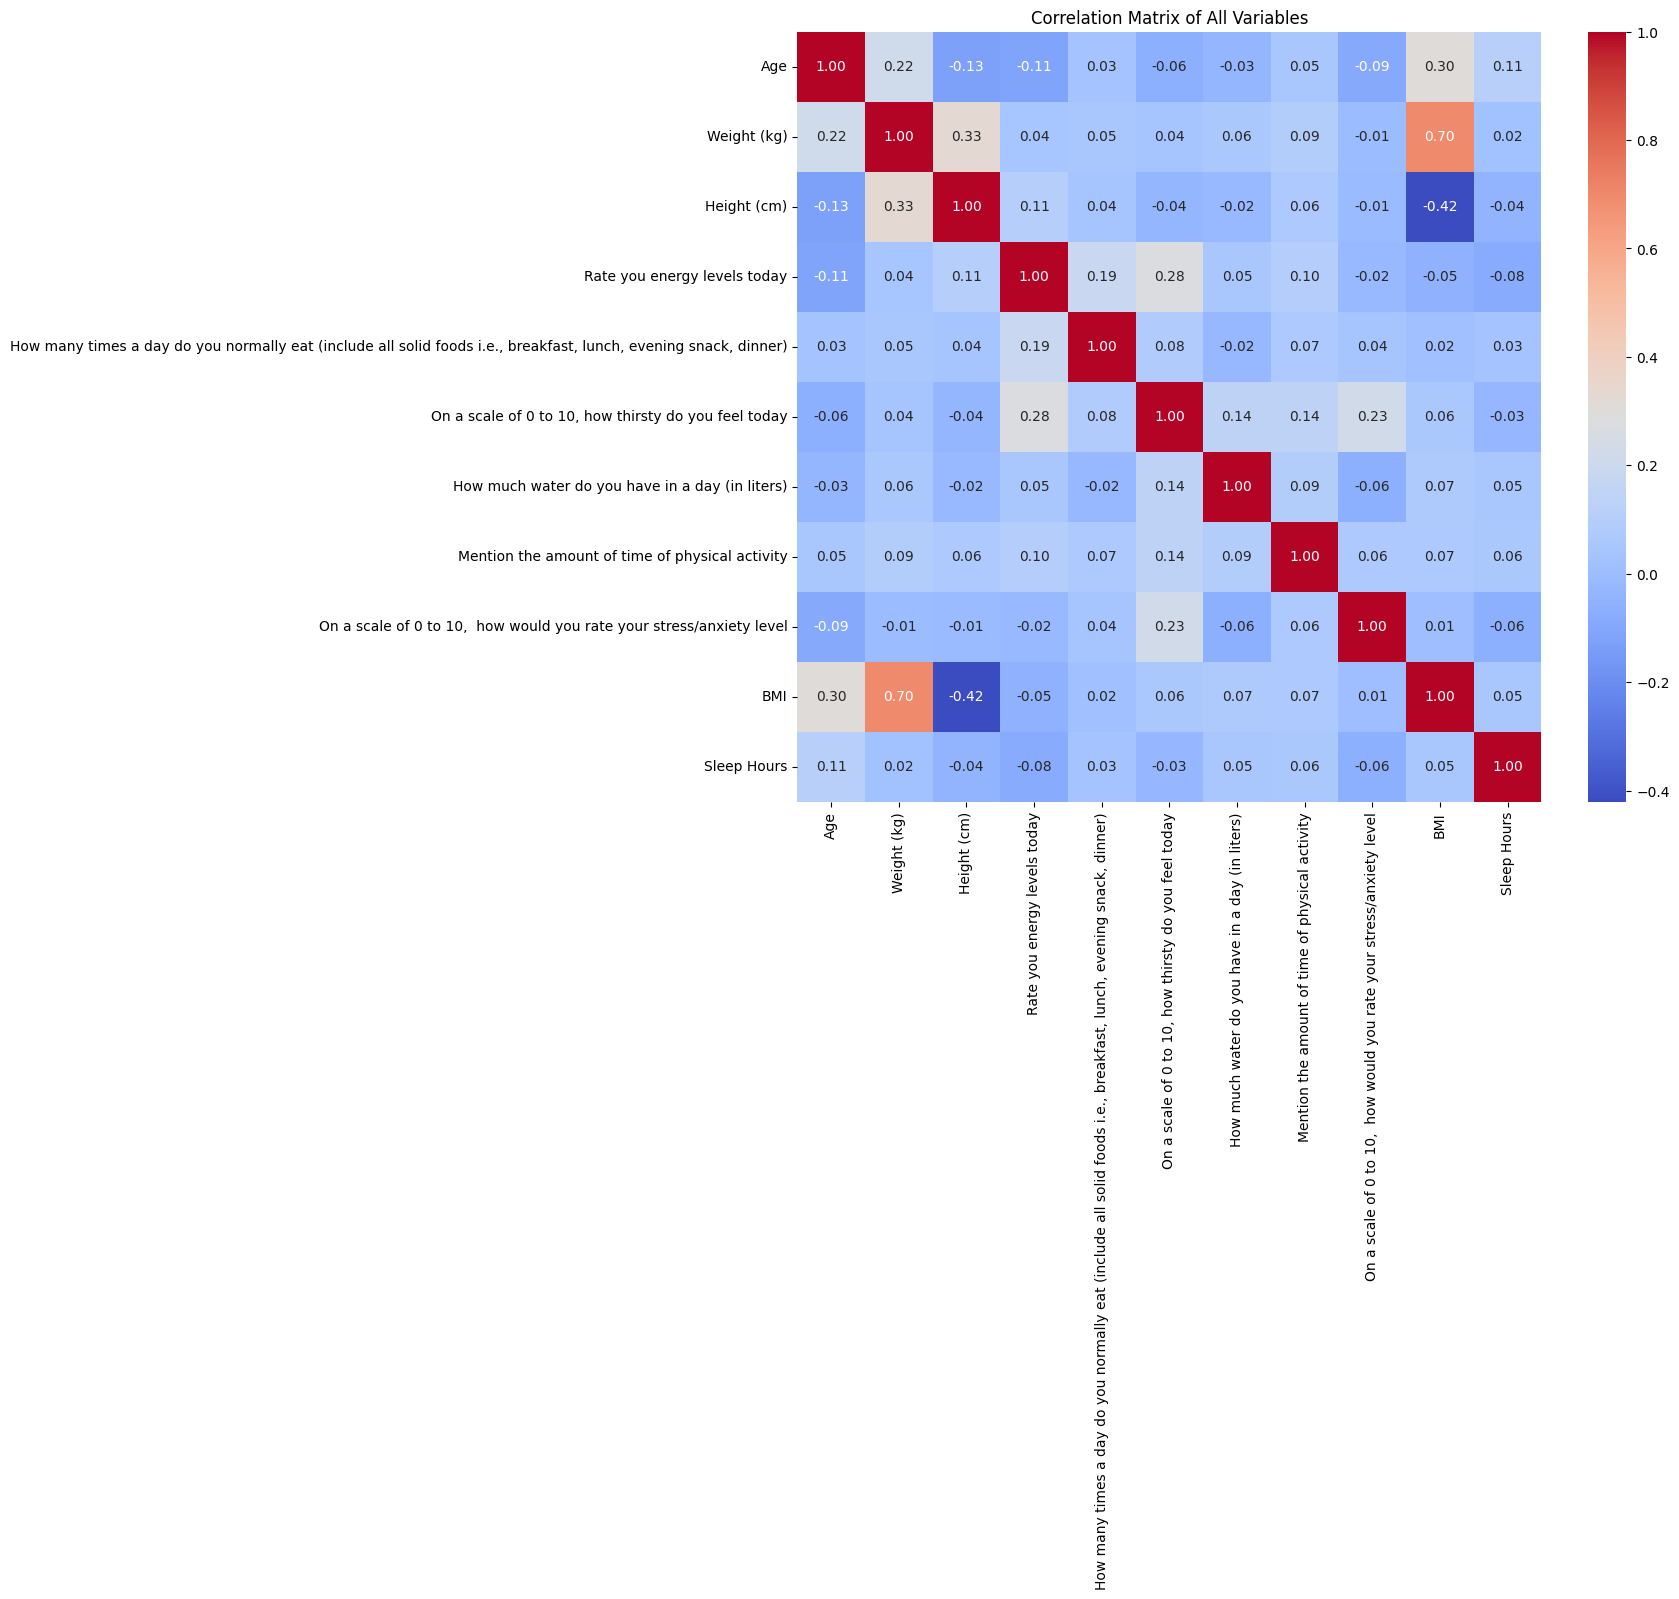

In [44]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of All Variables')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17980\1197616997.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



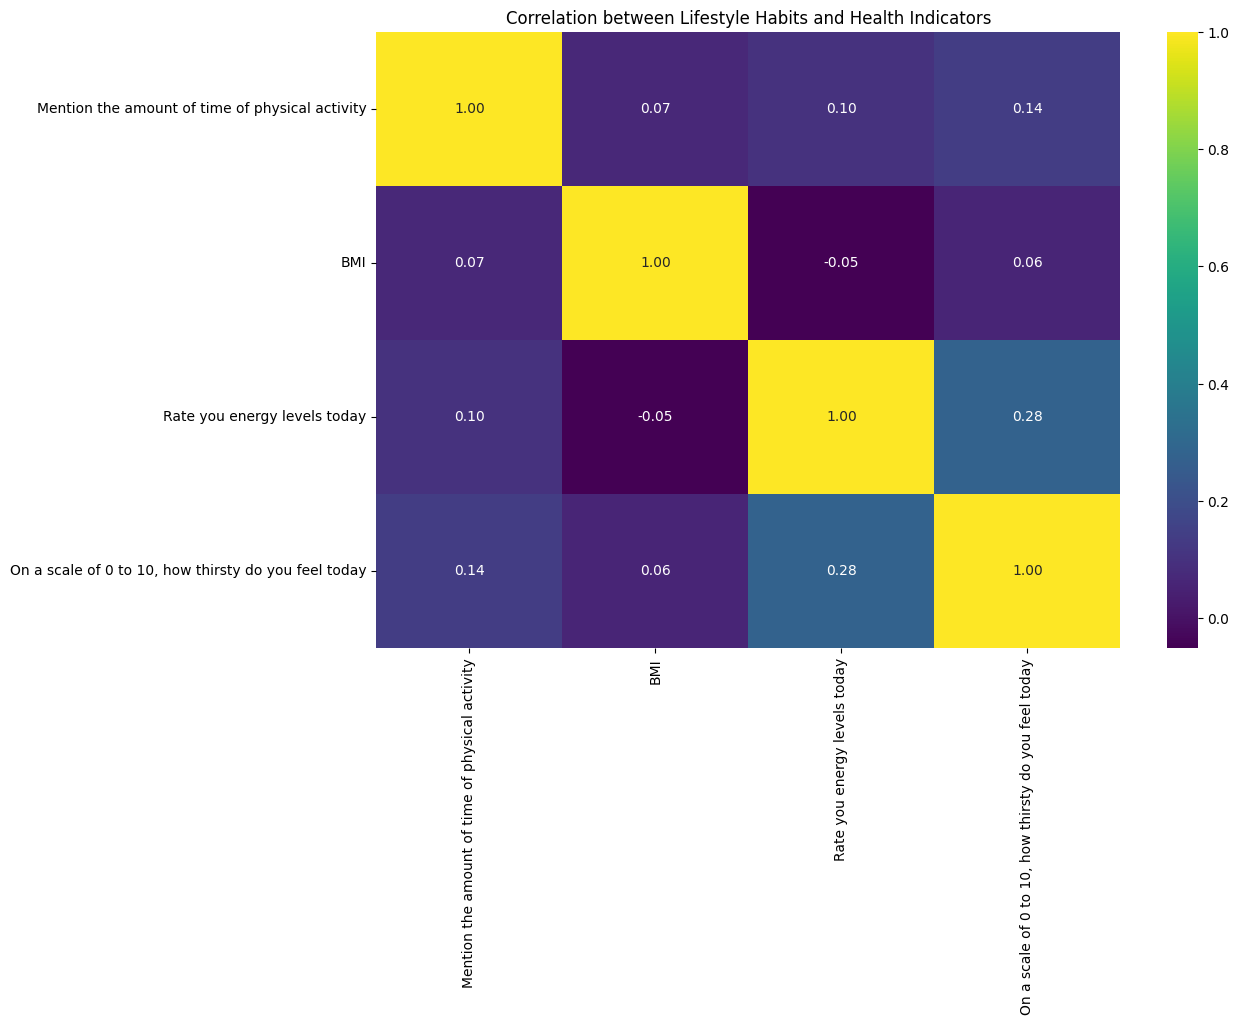

In [45]:
# Heatmap of lifestyle habits correlation with health indicators
lifestyle_columns = ['Enter Sleeping hours', 'Water Intake', 'Mention the amount of time of physical activity']
health_columns = ['BMI', 'Rate you energy levels today', 'On a scale of 0 to 10, how thirsty do you feel today']

lifestyle_health_corr = df[lifestyle_columns + health_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(lifestyle_health_corr, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation between Lifestyle Habits and Health Indicators')
plt.show()